<center>
<img src="https://drive.google.com/uc?id=1f1gGVI-rxcHjA90WEGNvvtSXF1pAxQwg" alt="Fasilkom UI" width="300"/>

CSGE603130 • Kecerdasan Artifisial dan Sains Data Dasar

Semester Ganjil 2021/2022

Fakultas Ilmu Komputer, Universitas Indonesia

##**Lab 2: *Statistics & Data Visualization***

###**Tenggat Waktu: 18 September 2021, 23.55 WIB**
</center>

####**Ketentuan:**

1. Dokumen *template* lab dengan format .ipynb dan dataset (jika dibutuhkan) telah disediakan di SCeLe
2. Jalankan kode pada dokumen .ipynb dan perhatikan dengan saksama apa yang potongan kode tersebut lakukan beserta dengan keluarannya. Jawablah **pertanyaan yang disisipkan** pada potongan program yang diberikan.
3. Dokumen Jupyter Notebook yang telah dilengkapi dengan jawaban dikumpulkan dengan format penamaan **Kelas_LabX_NPM_Nama.ipynb**. Contoh: F_Lab2_1706979341_Lulu Ilmaknun Qurotaini.ipynb
4. Kumpulkan dokumen tersebut pada submisi yang telah disediakan di SCeLe sesuai dengan kelas masing-masing sebelum **18 September 2021, 23.55 WIB**. Keterlambatan pengumpulan akan dikenakan pinalti.
5. Lab ini dirancang sebagai **tugas mandiri**. Plagiarisme tidak diperkenankan dalam bentuk apapun. Adapun kolaborasi berupa diskusi (tanpa menyalin maupun mengambil jawaban orang lain) dan literasi masih diperbolehkan dengan mencantumkan kolaborator dan sumber.

## **Pernyataan Integritas**

Wajib diisi. Tanpa pernyataan integritas submisi akan dikenakan penalti.

In [43]:
# Isi dengan data diri Anda
NAMA = "Muhammad Ichsanul Amal"
KELAS = "C"
NPM = "1906353454"

# Isi dengan NPM teman yang berdiskusi dengan Anda
KOLABORATOR = []

# Isi dengan sumber referensi yang Anda gunakan dalam mengerjakan
REFERENSI = []

In [44]:
PERNYATAAN_INTEGRITAS = "Saya, %s dari kelas %s dengan NPM %s, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.\n\
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.\n \
\n\
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.\n   \
(%s)" % (NAMA, KELAS, NPM, NAMA)

print(PERNYATAAN_INTEGRITAS)

Saya, Muhammad Ichsanul Amal dari kelas C dengan NPM 1906353454, menyatakan bahwa seluruh jawaban pada pekerjaan ini murni saya kerjakan sendiri.
Saya tidak mencontek jawaban, memberikan jawaban, maupun menyalin dari sumber manapun.
 
Jika saya melanggar pernyataan tersebut, saya siap menerima konsekuensi apapun yang diberikan.
   (Muhammad Ichsanul Amal)


# Exploratory Data Analysis

*Exploratory Data Analysis* (EDA) merupakan suatu proses menganalisis dataset untuk melihat karakteristik utama dari data. EDA adalah pemrosesan dasar yang dapat mempengaruhi keputusan-keputusan seorang data scientist dalam memproses data di tahap selanjutnya. Proses ini sering melibatkan dua hal, di antaranya *descriptive statistics* dan data *visualization*.

## Deskripsi Dataset Avocado

Tabel di bawah menunjukkan data pemindaian ritel mingguan 2018 untuk volume (unit) dan harga ritel Nasional. Data pemindaian ritel datang langsung dari pengecer berdasarkan penjualan eceran asli alpukat jenis Hass. Mulai tahun 2013, tabel di bawah ini mencerminkan kumpulan data ritel multi-outlet. AveragePrice di tabel mencerminkan biaya per unit (per alpukat). Kode Pencarian Produk (PLU) di tabel hanya untuk alpukat Hass. Varietas alpukat lainnya (misalnya kulit hijau) tidak termasuk dalam tabel ini.

* `Date`: the date of the observation
* `AveragePrice`: the average price of a single avocado
* `Total Volume`: total weight of avocados sold
* `4046`: total weight of avocados with PLU 4046 sold
* `4225`: total weight of avocados with PLU 4225 sold
* `4770`: total weight of avocados with PLU 4770 sold
* `Total Bags`: total weight of sold avocados put in bags (excluding those with PLUs)
* `Small Bags`: total weight of sold avocados put in small bags
* `Large Bags`: total weight of sold avocados put in large bags
* `XLarge Bags`: total weight of sold avocados put in extra large bags
* `type`: conventional or organic
* `year`: the year
* `region`: the city or region of the observation


In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import scipy.stats as scp
import statsmodels.api as sm

In [46]:
# Import dataset dengan index di kolom pertama
avocado_df = pd.read_csv('avocado.csv', index_col=0)

In [47]:
total_rows, total_attributes = avocado_df.shape
print('Jumlah data:', total_rows)
print("Jumlah atribut:", total_attributes)

avocado_df.head()

Jumlah data: 18249
Jumlah atribut: 13


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [48]:
# Melihat kolom-kolom pada dataframe
avocado_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18249 entries, 0 to 11
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.9+ MB


Terlihat sekilas tipe dan jumlah non-null dari setiap kolom. Dari informasi ini, kita mengetahui tidak ada kolom yang memiliki null untuk dataset avocado (karena semua kolom memiliki jumlah yang sama dengan jumlah data).

In [49]:
# Menampilkan statistics untuk setiap atribut numerik 
avocado_df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [50]:
# Menampilkan statistics untuk setiap atribut non-numerik atau kategorik
avocado_df.describe(include=np.object)

<ipython-input-50-e27487ad3299>:2: DeprecationWarning:

`np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



,Date,type,region
count,18249,18249,18249
unique,169,2,54
top,2017-07-09,conventional,Boise
freq,108,9126,338


## Descriptive Statistics

Ada banyak jenis measures yang dapat diterapkan untuk *descriptive statistics*.

Mengingat materi dari StatProb, ada
1. *Central tendency* (mean, median, mode)
2. *Dispersion* atau *variability* (variance, standard deviation)
3. Minimum, maximum
4. Range
5. Quantile
6. Percentile

**Central tendency sering dipakai untuk melihat distribusi data.**
Pada biasanya, `mean` lebih cocok untuk distribusi normal (yang terlihat simetris di tengah), sementara median lebih baik untuk distribusi bersifat *skewed* (berat sebelah). Tentunya, ini tidak berlaku untuk data kategorik yang hanya bisa menggunakan `mode`.

Terkadang central tendency saja tidak cukup untuk melihat distribusi data. Central tendency tidak bisa menggambarkan seberapa besar data tersebar. **Measure of dispersion merupakan ukuran yang biasa digunakan untuk melihat keragaman data atau seberapa besar data tersebar.** Terdapat beberapa ukuran untuk menentukan dispersi data pengamatan, seperti jangkauan/rentang (`range`) dan simpangan baku (`standard deviation`).

Secara umum, berikut adalah contoh penggunaan descriptive statistics (1), (2), (3) dari atribut `AveragePrice`:

In [51]:
# Array of 'AveragePrice' values
price_arr = avocado_df['AveragePrice']

price_stats = [
    ['Mean', np.mean(price_arr)],
    ['Median', np.median(price_arr)],
    ['Mode', scp.mode(price_arr)[0][0]],
    ['Standard Deviation', np.std(price_arr)],
    ['Variance', np.var(price_arr)],
    ['Minimum', np.min(price_arr)],
    ['Maximum', np.max(price_arr)],
]

pd.DataFrame(price_stats, columns=['Measure', 'Value'])

,Measure,Value
0,Mean,1.405978
1,Median,1.370000
2,Mode,1.150000
3,Standard Deviation,0.402666
4,Variance,0.162140
5,Minimum,0.440000
6,Maximum,3.250000


Pada hasil di atas, kita dapat lihat bahwa `mean` > `median` > `mode`. Data juga tersebar sebesar 0.4 dari nilai `mean`. Dengan nilai maksimum 3.25 dan minimum 0.44 ada kemungkinan bahwa data cenderung padat di nilai yang rendah atau padat ke kiri.

Diluar central tendency dan dispersion, statistik deskriptif juga mencakup ***skewness* yang mengukur kemiringan atau asimetri distribusi**. *Skewness* dari data dapat mempengaruhi pemrosesan, contohnya menangani *missing values* dengan *central tendency* yang tepat atau melakukan *sampling*. 

Cara melihat *skewness* dapat dilakukan melalui visualisasi KDE (Kernel Density Estimation) plot. KDE plot menunjukkan estimasi dari fungsi probabilitas *density* pada sebuah data yang bersifat kontinu.

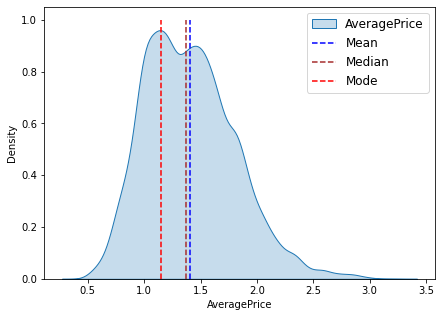

In [52]:
# KDE Plot (Distribusi data) dari AveragePrice

plt.figure(figsize=(7,5))
sns.kdeplot(price_arr, shade=True)
plt.vlines(x=np.mean(price_arr), ymin=0, ymax=1, color='blue', linestyle='--')
plt.vlines(x=np.median(price_arr), ymin=0, ymax=1, color='brown', linestyle='--')
plt.vlines(x=scp.mode(price_arr)[0][0], ymin=0, ymax=1, color='red', linestyle='--')
plt.legend(['AveragePrice', 'Mean', 'Median', 'Mode'], fontsize=12)
plt.show()

Terlihat bahwa distribusi bersifat skewed karena sedikit lebih berat di kiri. Berdasarkan visualisasi, median, mean, dan modus tidak selalu sama. Pada kasus ini, terlihat bahwa median dapat menjadi pengukuran yang paling tepat untuk menggambarkan central tendency dari data.

Selain itu, kita dapat mengecek nilai skewness dari atribut-atribut numerik dengan menggunakan fungsi `.skew()` berikut:

In [53]:
# Mengambil hanya atribut float numerik
numeric_avocado = avocado_df.select_dtypes(include=['float64'])

# Mengecek nilai skewness dari data
numeric_avocado.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
dtype: float64

Interpretasi nilai *skewness*:
*   Jika nilainya positif maka right skewed (buntut kanan > buntut kiri)
*   Jika nilainya negatif maka left skewed (buntut kiri > buntut kanan)
*   Jika skewness = 0, data simetris

Dari hasil tersebut, didapati bahwa AveragePrice memiliki karakteristik right skewed dengan tingkat asimetris yang tidak terlalu tinggi. Sementara atribut numerik lain memiliki asimetris yang sangat tinggi ke kanan.


Untuk membandingkan distribusi data A ke data B, kita dapat menggunakan overlapping Histogram atau KDE plot.

Misalkan kita ingin melihat perbandingan `AveragePrice` dari conventional vs organic avocados.

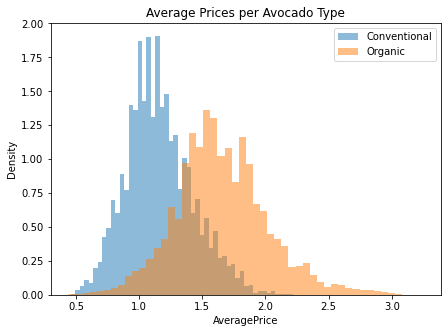

In [54]:
conventional = avocado_df[avocado_df['type'] == "conventional"]
organic = avocado_df[avocado_df['type'] == "organic"]
conv_price = conventional['AveragePrice']
org_price = organic['AveragePrice']

# Histogram dengan "density=True" untuk menyerupai KDE Plot
plt.figure(figsize=(7,5))
plt.title("Average Prices per Avocado Type", fontsize=12)
plt.hist(conv_price, alpha=0.5, bins=50, density=True, label="Conventional")
plt.hist(org_price, alpha=0.5, bins=50, density=True, label="Organic")
plt.xlabel("AveragePrice")
plt.ylabel("Density")
plt.legend()
plt.show()

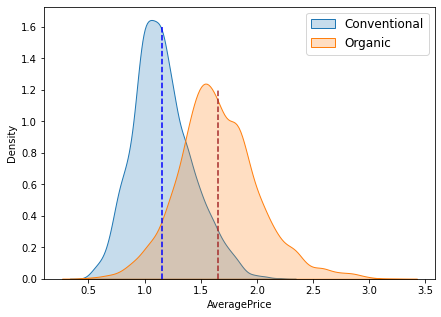

In [55]:
# KDE Plot
plt.figure(figsize=(7,5))
sns.kdeplot(conv_price, shade=True)
sns.kdeplot(org_price, shade=True)
plt.legend(['Conventional','Organic'], fontsize=12)
plt.vlines(x=conv_price.mean(), ymin=0, ymax=1.6, color='blue', linestyle='--')
plt.vlines(x=org_price.mean(), ymin=0, ymax=1.2, color='brown', linestyle='--')
plt.show()

## Correlation

Korelasi merupakan pengukuran dependensi antar atribut dalam data. Korelasi sering digunakan untuk mengukur apakah suatu atribut memiliki hubungan yang kuat secara linier atau tidak. 

Terdapat beberapa jenis korelasi yang dapat digunakan pada jenis data yang berbeda. ***Pearson correlation*** umum digunakan untuk mengukur korelasi pada atribut numerik.

In [56]:
# Menampilkan nilai korelasi atribut numerik (dari koefisien Pearson)
avocado_df.corr(method='pearson')

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.036531
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,0.071552
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,0.063915
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,0.087891
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,0.081033
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,0.071552,0.063915,0.087891,0.081033,1.000000


Kita sudah dapat melihat nilai korelasi pada matrix di atas. Akan tetapi, visualisasi dari matrix tersebut kurang enak untuk dilihat. Untuk itu, kita akan menggunakan visualisasi heatmap.

Text(0.5, 1.0, 'Correlation matrix')

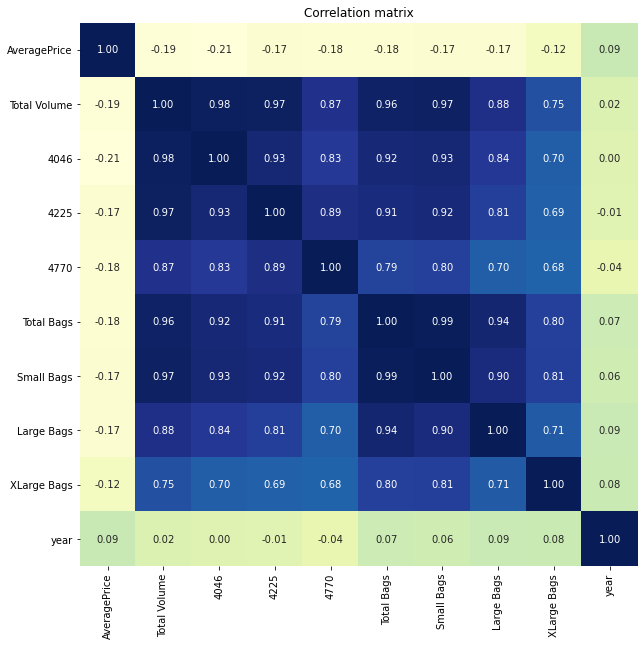

In [57]:
# Visualisasi matriks korelasi dengan heatmap
plt.figure(figsize=(10,10))

sns.heatmap(avocado_df.select_dtypes(np.number).corr(), 
        annot=True,
        cbar=False,
        fmt="0.2f",
        cmap="YlGnBu",
        xticklabels=avocado_df.select_dtypes(np.number).columns,
        yticklabels=avocado_df.select_dtypes(np.number).columns)
plt.title("Correlation matrix")

Dari heatmap diatas, kita bisa menentukan pasangan atribut apa saja yang memiliki relasi yang tinggi (warna biru gelap). Untuk membuktikan, dibawah terdapat 3 scatterplot yang menunjukkan korelasi dengan `Total Volume`, yakni
* `Total Bags`: 0.96 (terlihat berbanding lurus naik)
* `AveragePrice`: -0.19 (ada sedikit tren terbalik tetapi semua hampir berkumpul di total volume 0 - 1)
* `year`: 0.01 (membingungkan)

<AxesSubplot:xlabel='Total Volume', ylabel='Total Bags'>

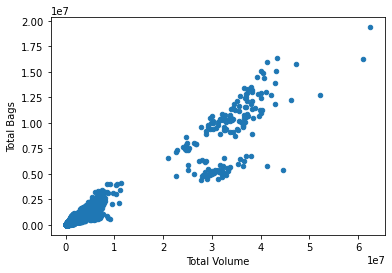

In [58]:
avocado_df.plot.scatter(x="Total Volume", y="Total Bags", figsize=(6,4))

Dari visualisasi tersebut kita dapat melihat bahwa `Total Bags` berbanding lurus dengan `Total Volume`. Semakin tinggi `Total Bags`, maka `Total Volume` juga akan meningkat (tentu sangat masuk akal).

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

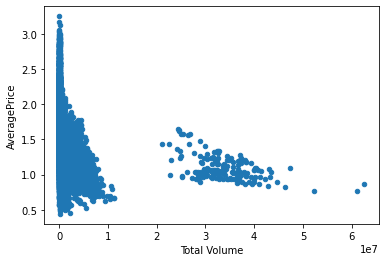

In [59]:
avocado_df.plot.scatter(x="Total Volume", y="AveragePrice", figsize=(6,4))

Antara `Total Volume` dan `AveragePrice` kita dapati bahwa terjadi hubungan yang negatif di mana peningkatan volume menyebabkan harga menurun. Hal ini mungkin terjadi karena penjualan yang agresif (mungkin seperti penjualan grosir dan sebagainya).

<AxesSubplot:xlabel='Total Volume', ylabel='year'>

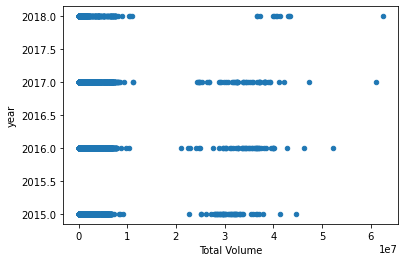

In [60]:
avocado_df.plot.scatter(x="Total Volume", y="year", figsize=(6,4))

Dari visualisasi di atas, kita mungkin menemui perhitungan dan visualisasi yang agak membingungkan. Hal ini wajar terjadi dikarenakan tahun yang dianggap sebagai data numerik sedangkan lebih tepat dianggap sebagai data kategorik. Tipe data akan sangat mempengaruhi pemrosesan di EDA, maka kita perlu berhati-hati untuk menentukan tipe data yang sesuai.

## Data Visualization

In [61]:
# Fungsi yang membuat plot untuk melihat distribusi frekuensi untuk satu kolom/atribut
def countplot(column, df):
    return sns.countplot(x=column, data=df)

<AxesSubplot:xlabel='type', ylabel='count'>

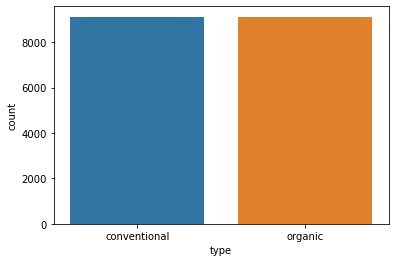

In [62]:
countplot('type', avocado_df)

Sekilas dari countplot, atribut `type` memiliki data yang sangat seimbang (*perfectly balanced as all things should be*).

<AxesSubplot:xlabel='year', ylabel='count'>

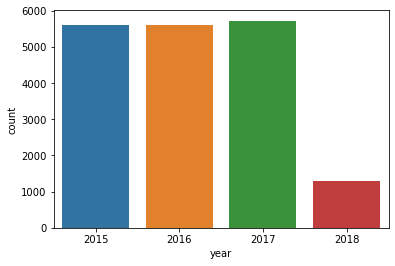

In [63]:
countplot('year', avocado_df)

Sedangkan, atribut `year` menandakan kalau data dari 2018 jauh lebih sedikit dibanding tahun-tahun sebelumnya. Hal ini wajar terjadi karena dataset memang diambil pada pertengahan tahun 2018.

<AxesSubplot:xlabel='type', ylabel='AveragePrice'>

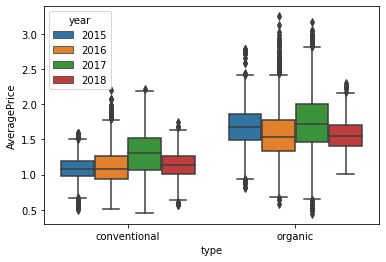

In [64]:
# Menampilkan boxplot type terhadap average price per tahun
sns.boxplot(x="type", y="AveragePrice", hue="year", data=avocado_df)

Terlihat bahwa avocado bertipe `organic` memiliki rata-rata harga (`AveragePrice`) yang lebih tinggi dibanding dengan yang bertipe `conventional` setiap tahunnya.

<AxesSubplot:xlabel='type', ylabel='Total Volume'>

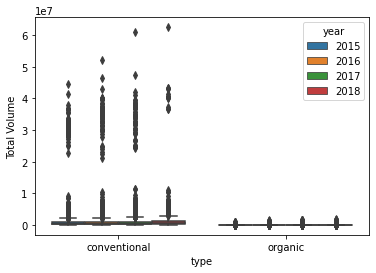

In [65]:
# Menampilkan boxplot type terhadap total volume per tahun
sns.boxplot(x="type", y="Total Volume", hue="year", data=avocado_df)

Jika dilihat dari total volume yang terjual, terlihat sepertinya avocado memiliki "outliers" yang cukup banyak dan jauh dari IQR sampai boxplotnya sendiri tidak terlihat.

In [66]:
# Menampilkan boxplot untuk atribut yang memiliki banyak unique values (seperti region) terhadap average price
fig = px.box(avocado_df, x='region', y='AveragePrice')
fig.show()

## Latihan Soal

### **SOAL 1: Descriptive Statistics**

(a) Tampilkan descriptive statistics dari atribut `Total Volume`! (hint: tambahkan range, Q1, Q2, Q3, 20th Percentile)

In [67]:
# 1(a) Implementasi kode di sini
np.set_printoptions(suppress=True)

volume_arr = avocado_df['Total Volume']

price_stats = [
    ['Mean', np.mean(volume_arr)],
    ['Median', np.median(volume_arr)],
    ['Mode', scp.mode(volume_arr)[0][0]],
    ['Standard Deviation', np.std(volume_arr)],
    ['Variance', np.var(volume_arr)],
    ['Minimum', np.min(volume_arr)],
    ['Maximum', np.max(volume_arr)],
    ['Range', np.ptp(volume_arr)],
    ['Q1', np.percentile(volume_arr, 25)],
    ['Q2', np.percentile(volume_arr, 50)],
    ['Q3', np.percentile(volume_arr, 75)],
    ['20th Percentile', np.percentile(volume_arr, 20)],
    ['Skewness', volume_arr.skew()],
    ['Kurtosis', volume_arr.kurt()],
]

pd.DataFrame(price_stats, columns=['Measure', 'Value'])
# volume_arr.describe()

,Measure,Value
0,Mean,8.506440e+05
1,Median,1.073768e+05
2,Mode,2.038990e+03
3,Standard Deviation,3.453451e+06
4,Variance,1.192632e+13
5,Minimum,8.456000e+01
6,Maximum,6.250565e+07
7,Range,6.250556e+07
8,Q1,1.083858e+04
9,Q2,1.073768e+05


(b) Apa central tendency paling cocok untuk atribut `Total Volume`? Berikan alasan!

Total volume merupakan data yang continous sehingga pilihannya lebih baik mean atau median. Kemudian, dari boxplot di bawah ini data memiliki banyak outliers sehingga mean kurang cocok digunakan sebagai central tendency, dan lebih baik menggunakan median. 

referensi : 
- https://courses.lumenlearning.com/introstats1/chapter/when-to-use-each-measure-of-central-tendency/

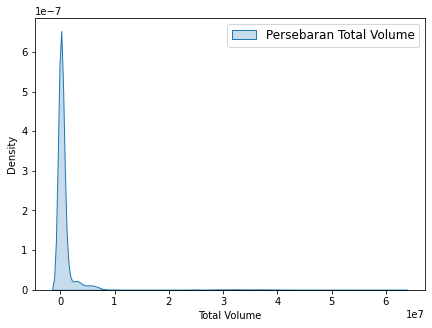

In [68]:
# KDE Plot (Distribusi data) dari AveragePrice

plt.figure(figsize=(7,5))
sns.kdeplot(volume_arr, shade=True)
plt.legend(['Persebaran Total Volume'], fontsize=12)
plt.show()

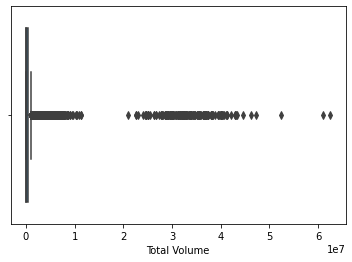

In [69]:
# 1(b) Implementasi kode di sini
sns.boxplot(x=volume_arr)
plt.show()

### **SOAL 2: Data Visualization**

Untuk setiap sub-soal, pilih salah satu dari visualisasi berikut:
* Pie chart
* Bar chart
* Scatter plot
* Box plot
* Histogram
* Line graph

Beberapa kasus terkadang memiliki lebih dari satu "jawaban yang tepat", karena ada banyak cara untuk visualisasi data. Pilihlah yang menurut Anda paling cocok berdasarkan kasus yang diberikan.

**Secara eksplisit, tulis chart apa yang Anda pilih dan alasannya.**

(a) Buatlah visualisasi untuk melihat jumlah alpukat yang terjual di setiap region. Apakah California adalah region dengan rata-rata penjualan alpukat terbanyak? (Asumsi `TotalUS` bukanlah sebuah region)

In [70]:
avocado_df = avocado_df[avocado_df['region'] != "TotalUS" ] # Drop TotalUS

<AxesSubplot:title={'center':'Total Berat Alpukat Terjual pada Tiap Region'}, ylabel='Region'>

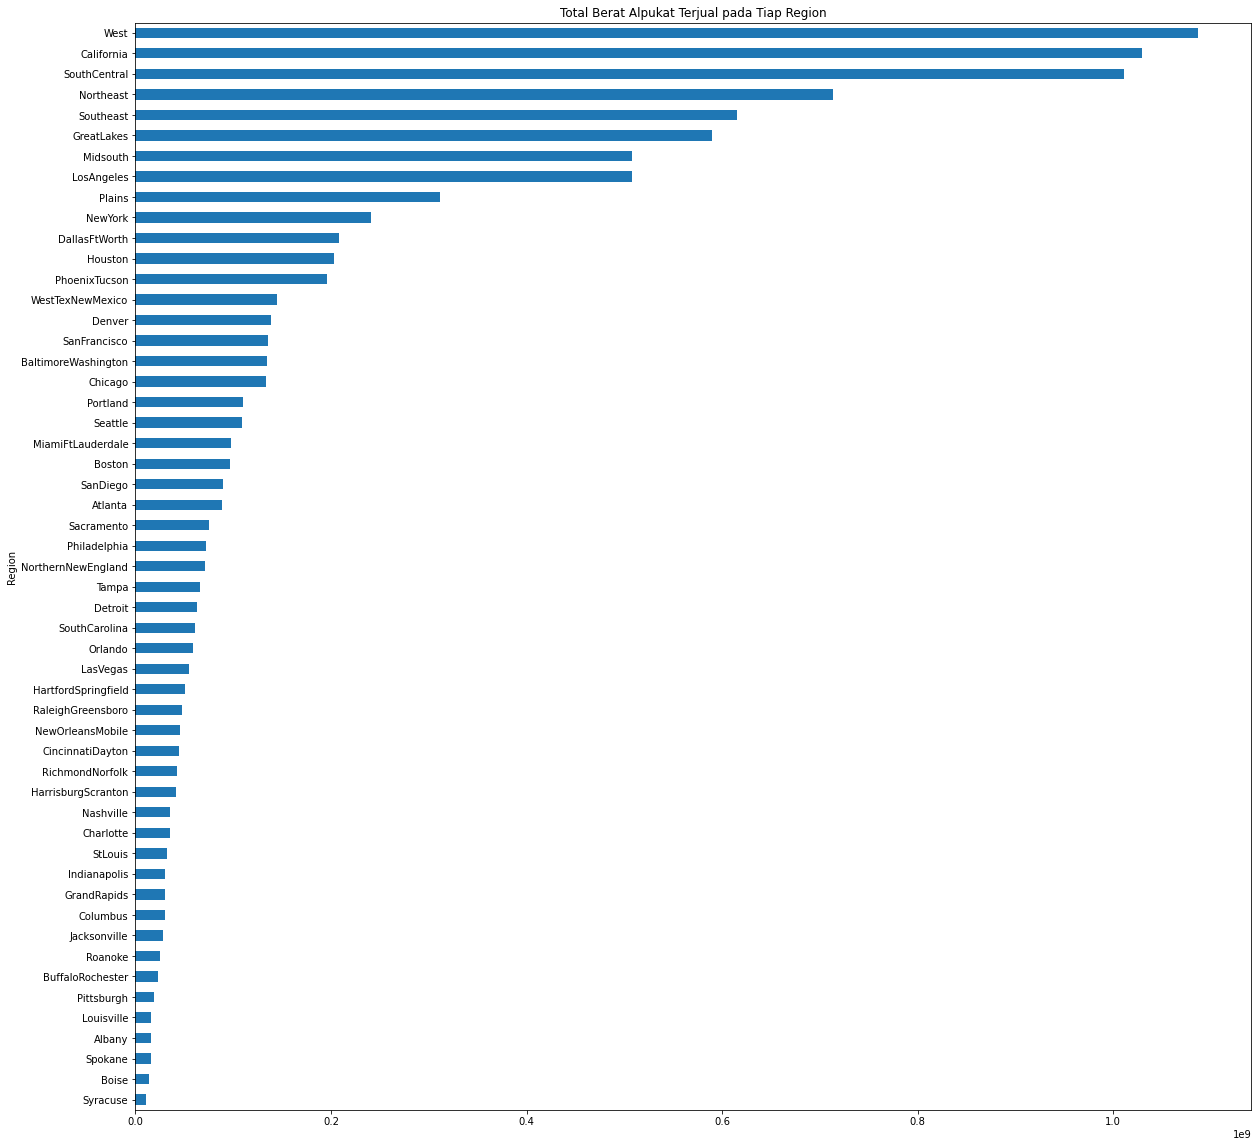

In [71]:
# 2(a) Implementasi kode di sini
df = avocado_df[["Total Volume", "region"]]
df_sum = df.groupby(['region'])["Total Volume"].sum()
df_sum.sort_values(inplace=True)
df_sum.plot(kind='barh', title='Total Berat Alpukat Terjual pada Tiap Region',
        xlabel='Region', figsize=(20, 20))

<AxesSubplot:title={'center':'Berat rata-rata Alpukat Terjual Tiap Region'}, ylabel='Region'>

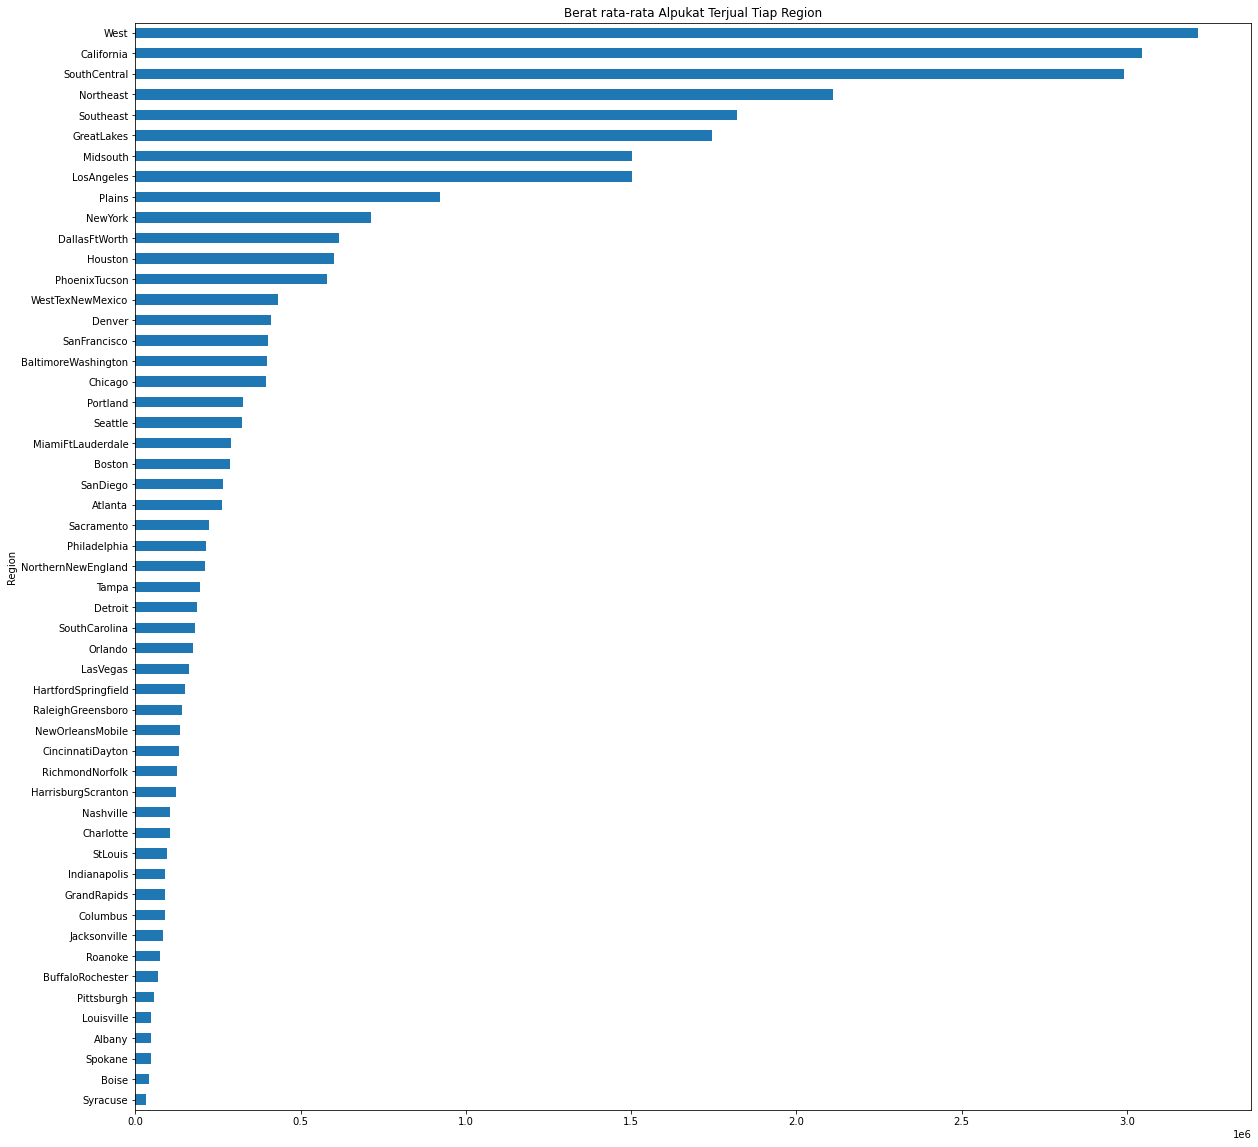

In [72]:
# 2(a) Implementasi kode di sini
df = avocado_df[["Total Volume", "region"]]
df_sum = df.groupby(['region'])["Total Volume"].mean()
df_sum.sort_values(inplace=True)
df_sum.plot(kind='barh', title='Berat rata-rata Alpukat Terjual Tiap Region',
        xlabel='Region', figsize=(20, 20))

Bukan, region dengan rata-rata penjualan alpukat terbanyak adalah West. Alasan memilih barplot adalah karena lebih mudah dilihat jumlah harganya dan dapat dilihat dengan jelas region dengan penjualan terbanyak.

(b) Buatlah visualisasi yang menunjukkan average price per tahun. Dari visualisasi, di antara 2 tahun apakah yang memiliki perbedaan average price yang tertinggi?

Antara 2017 dan 2016. Alasan menggunakan menurut line chart adalah karena dengan line chart, dapat dilihat dengan jelas perubahan antar tahunnya. Berikut juga saya bandingkan dengan menggunakan bar chart.

<ipython-input-73-fe77bce9ddcf>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



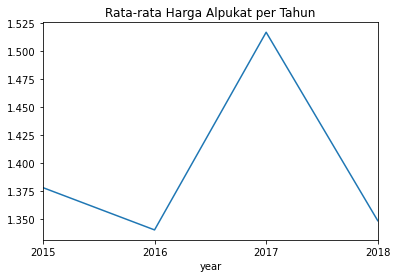

In [73]:
#mean# 2(b) Implementasi kode di sini
df = avocado_df[["AveragePrice", "year"]]
df['year'] = pd.to_datetime(df['year'], format='%Y')

df_sum = df.groupby(['year'])["AveragePrice"].mean()
df_sum.plot.line(title='Rata-rata Harga Alpukat per Tahun')
plt.show()


year
2015    1.377821
2016    1.340056
2017    1.516610
2018    1.348294
Name: AveragePrice, dtype: float64


<AxesSubplot:title={'center':'Rata-rata Harga Alpukat per Tahun'}, xlabel='Tahun'>

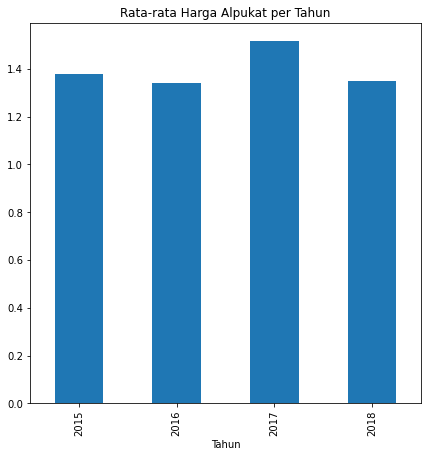

In [74]:
#mean# 2(b) Implementasi kode di sini
df = avocado_df[["AveragePrice", "year"]]
# df = df[~df.region.isin(["TotalUS"])
df_sum = df.groupby(['year'])["AveragePrice"].mean()
print(df_sum)
df_sum.plot(kind='bar', title='Rata-rata Harga Alpukat per Tahun',
        xlabel='Tahun', figsize=(7, 7))

(c) Buatlah visualisasi dari persentase total volume alpukat yang terjual dengan average price >= 1.4 dari masing-masing tipe. Berapakah persentase dari organic avocadoes yang terjual dengan average price >= 1.4?

15.1 %. Alasan menggunakan pie chart adalah karena tujuan dari visualisasinya adalah persentase sehingga lebih intuitif dan lebih mudah dipahami.

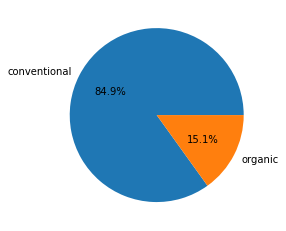

In [75]:
# 2(c) Implementasi kode di sini
df = avocado_df[avocado_df["AveragePrice"] >= 1.4][["type", "Total Volume"]]
ser = df.groupby("type").sum()

plt.pie(
    ser['Total Volume'],
    labels=ser.index,
    autopct='%1.1f%%',
)
plt.show()

(d) Buatlah visualisasi untuk melihat pola dari `AveragePrice` dan `Small Bags`. Berdasarkan apa yang Anda lihat, apakah ada outlier(s) untuk alpukat dengan average price sekitar 1.0?

Ya, terdapat outlier pada diagram scatter di sekitar `Small Bags` lebih dari 3 dan `Average Price` antara 0.5 hingga 1.

              AveragePrice  Small Bags
AveragePrice      1.000000   -0.296151
Small Bags       -0.296151    1.000000


<AxesSubplot:xlabel='Small Bags', ylabel='AveragePrice'>

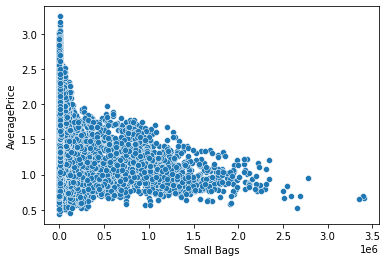

In [76]:
# 2(d) Implementasi kode di sini
df = avocado_df[["AveragePrice", "Small Bags"]]
print(df.corr())
sns.scatterplot(x=df["Small Bags"], y=df["AveragePrice"])



(e) Buatlah visualisasi untuk melihat apakah ada outliers di atribut `Total Bags` untuk setiap region. Berikan satu contoh region yang terlihat tidak memiliki outlier.

GreatLakes

In [77]:
# 2(e) Implementasi kode di sini
fig = px.box(avocado_df, x='region', y='Total Bags')
fig.show()

(f) Lihatlah perbandingan distribusi data dari jumlah alpukat yang dijual di California dengan GreatLakes. Berikan analisis Anda.

count    338.000000
mean       1.395325
std        0.390543
min        0.670000
25%        1.080000
50%        1.375000
75%        1.660000
max        2.580000
Name: AveragePrice, dtype: float64
count    338.000000
mean       1.338550
std        0.256373
min        0.730000
25%        1.110000
50%        1.340000
75%        1.550000
max        1.980000
Name: AveragePrice, dtype: float64


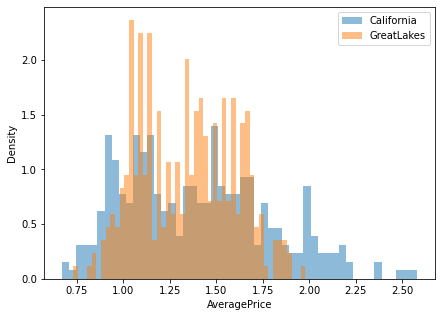

In [78]:
california_price = avocado_df[avocado_df["region"] == "California"]["AveragePrice"]
greatlakes_price = avocado_df[avocado_df["region"] == "GreatLakes"]["AveragePrice"]

print(california_price.describe())
print(greatlakes_price.describe())

# Histogram dengan "density=True" untuk menyerupai KDE Plot
plt.figure(figsize=(7,5))
plt.hist(california_price, alpha=0.5, bins=50, density=True, label="California")
plt.hist(greatlakes_price, alpha=0.5, bins=50, density=True, label="GreatLakes")
plt.xlabel("AveragePrice")
plt.ylabel("Density")
plt.legend()
plt.show()

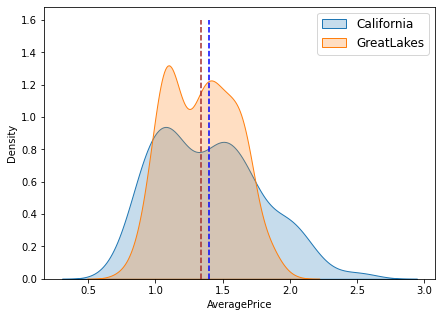

In [79]:
# 2(f) Implementasi kode di sini
# KDE Plot

california_price = avocado_df[avocado_df["region"] == "California"]["AveragePrice"]
greatlakes_price = avocado_df[avocado_df["region"] == "GreatLakes"]["AveragePrice"]

plt.figure(figsize=(7,5))
sns.kdeplot(california_price, shade=True)
sns.kdeplot(greatlakes_price, shade=True)
plt.legend(['California','GreatLakes'], fontsize=12)
plt.vlines(x=california_price.mean(), ymin=0, ymax=1.6, color='blue', linestyle='--')
plt.vlines(x=greatlakes_price.mean(), ymin=0, ymax=1.6, color='brown', linestyle='--')
plt.show()


Rata-rata AveragePrice dari Avocado California lebih condong ke kanan sedikit daripada GreatLakes serta Avocado California memiliki harga yang lebih beragam atau variansnya lebih besar dibanding GreatLakes. Secara sekilas, rata-rata harga Avocado lebih beragam dari yang paling murah hingga paling mahal dan rata-rata harga Avocado GreatLakes lebih banyak berkumpul di area rata-ratanya.